<a href="https://colab.research.google.com/github/CarlaLS/Entregas-CoderHouse-Ciencias-de-Datos/blob/main/ProyectoQualityWine_ParteI_Salamone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto: Comportamiento de la calidad de vinos

Este proyecto se basa en el análisis de datos sobre una colección de diversas propiedades fisicoquímicas de los vinos tintos, como acidez, contenido de azúcar, valor de pH, contenido de alcohol, etc., que sirven para poder comprender los posibles factores que influyen en la calificación de calidad de un vino.

Este dataset (fuente: "http://www.kaggle.com") cuenta en principio con 1599 observaciones y 12 variables totales, donde cada fila representa una muestra de vino única y cada columna representa un atributo diferente relacionado con las características del vino (11 variables). La columna "calidad" (variable Nº 12), calificada por expertos, sirve como variable objetivo para las tareas de modelado predictivo.

Cada uno de los parámetros químicos del vino aporta información de relevancia. Los azúcares suelen medirse al finalizar la fermentación alcohólica para tener una prueba de que las levaduras han consumido la totalidad (o casi) de los azúcares naturalmente presentes en el mosto.

Las medidas de sulfuroso, en combinación con el pH del vino, sirven para conocer qué cantidad de sulfitos están protegiendo el vino durante su elaboración en bodega. Así, en determinados momentos críticos (especialmente cuando se va a embotellar y cuando se hacen trasiegos) es habitual tener que sulfitar para proteger el vino (siempre con dosis calculadas) de oxidaciones y contaminaciones con microorganismos como las bacterias acéticas. Estas bacterias darían lugar a un incremento de la acidez volátil, es decir, de olores a ácido acético (vinagre) que estropearían el vino.

Los parámetros de acidez total y grado alcohólico son especialmente relevantes en los vinos que se van a someter a crianza en barrica u otros recipientes, ya que ambos (acidez y alcohol) han de ser elevados para que el vino evolucione favorablemente en el tiempo. También durante la fermentación maloláctica de los tintos (principalmente), la disminución de la acidez total es uno de los parámetros que sirven para supervisar que ésta transcurre de forma adecuada.

# Hipótesis Propuestas
Hipótesis 1: Un mayor contenido de alcohol está asociado positivamente con la calidad del vino.

Hipótesis 2: Niveles moderados de acidez fija están correlacionados positivamente con la calidad del vino.

Hipótesis 3: Bajos niveles de acidez volátil están asociados con una mayor calidad del vino.

Hipótesis 4: Un nivel equilibrado de pH está positivamente correlacionado con la calidad del vino.

Hipótesis 5: Bajos niveles de azúcar residual están asociados con una mayor calidad del vino.

Hipótesis 6: Altos niveles de sulfatos están asociados positivamente con la calidad del vino.

Hipótesis 7: Una menor densidad está correlacionada con una mayor calidad del vino.

Hipótesis 8: Un mayor contenido de ácido cítrico está positivamente correlacionado con la calidad del vino.

Hipótesis 9: Bajos niveles de dióxido de sulfuro libre y total están asociados con una mayor calidad del vino.

Hipótesis 10: Un menor contenido de cloruros está asociado con una mayor calidad del vino.

# Importación de las Librerías

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [ ]:
#plt.style.use('seaborn')

# Carga del Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_wine= pd.read_csv('/content/drive/MyDrive/DataSets/Quality_Wine.csv', sep=';' )
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df_wine.shape # para saber cuántas filas y columnas tiene el dataset

(1599, 12)

In [ ]:
df_wine.info() #encontrar datos faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   object 
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   object 
 11  quality               1599 non-null   int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 150.0+ KB


# Preprocesamiento de Datos

En la tabla de más arriba se observa que no hay valores faltantes.
Se observa además que las variables "densidad" y "alcohol" están tipificadas como "Object" y las mismas corresponden a "Float".

## Correción la variable alcohol de object a float

In [ ]:
df_wine["alcohol"].head(10)

0     9.4
1     9.8
2     9.8
3     9.8
4     9.4
5     9.4
6     9.4
7    10.0
8     9.5
9    10.5
Name: alcohol, dtype: object

In [ ]:
df_wine = df_wine[pd.to_numeric(df_wine["alcohol"], errors="coerce").notnull()]

df_wine["alcohol"] = df_wine["alcohol"].astype(float)

<ipython-input-31-5a3ef8823870>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wine["alcohol"] = df_wine["alcohol"].astype(float)


In [ ]:
df_wine.info() # verfica si se modificó el tipo de la variable alcohol

<class 'pandas.core.frame.DataFrame'>
Index: 1593 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1593 non-null   float64
 1   volatile acidity      1593 non-null   float64
 2   citric acid           1593 non-null   float64
 3   residual sugar        1593 non-null   float64
 4   chlorides             1593 non-null   float64
 5   free sulfur dioxide   1593 non-null   float64
 6   total sulfur dioxide  1593 non-null   float64
 7   density               1593 non-null   object 
 8   pH                    1593 non-null   float64
 9   sulphates             1593 non-null   float64
 10  alcohol               1593 non-null   float64
 11  quality               1593 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 161.8+ KB


## Corrección de la variable densidad

In [ ]:
df_wine["density"].head(10)

0    0.9978
1    0.9968
2     0.997
3     0.998
4    0.9978
5    0.9978
6    0.9964
7    0.9946
8    0.9968
9    0.9978
Name: density, dtype: object

In [ ]:
# Convert the "density" column to float
df_wine["density"] = pd.to_numeric(df_wine["density"], errors="coerce").astype(float)


df_wine["density"].dtype

dtype('float64')

In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1593 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1593 non-null   float64
 1   volatile acidity      1593 non-null   float64
 2   citric acid           1593 non-null   float64
 3   residual sugar        1593 non-null   float64
 4   chlorides             1593 non-null   float64
 5   free sulfur dioxide   1593 non-null   float64
 6   total sulfur dioxide  1593 non-null   float64
 7   density               1592 non-null   float64
 8   pH                    1593 non-null   float64
 9   sulphates             1593 non-null   float64
 10  alcohol               1593 non-null   float64
 11  quality               1593 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 161.8 KB


In [ ]:
df_wine.isnull().sum() # observación de datos faltantes en la variable densidad

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 1
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:

df_wine = df_wine.dropna() #eliminación de dato faltante


#df_wine['density'].fillna(df_wine['density'].median(), inplace=True)




In [ ]:
df_wine.isnull().sum() #verificación de la eliminación de datos faltantes

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1592 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1592 non-null   float64
 1   volatile acidity      1592 non-null   float64
 2   citric acid           1592 non-null   float64
 3   residual sugar        1592 non-null   float64
 4   chlorides             1592 non-null   float64
 5   free sulfur dioxide   1592 non-null   float64
 6   total sulfur dioxide  1592 non-null   float64
 7   density               1592 non-null   float64
 8   pH                    1592 non-null   float64
 9   sulphates             1592 non-null   float64
 10  alcohol               1592 non-null   float64
 11  quality               1592 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 161.7 KB


*El dataframe tiene 1592 filas y 12 columnas. Se corrigieron los datos faltantes*. Se corrigieron los tipos de las variables densidad y alcohol





# Análsis de los datos

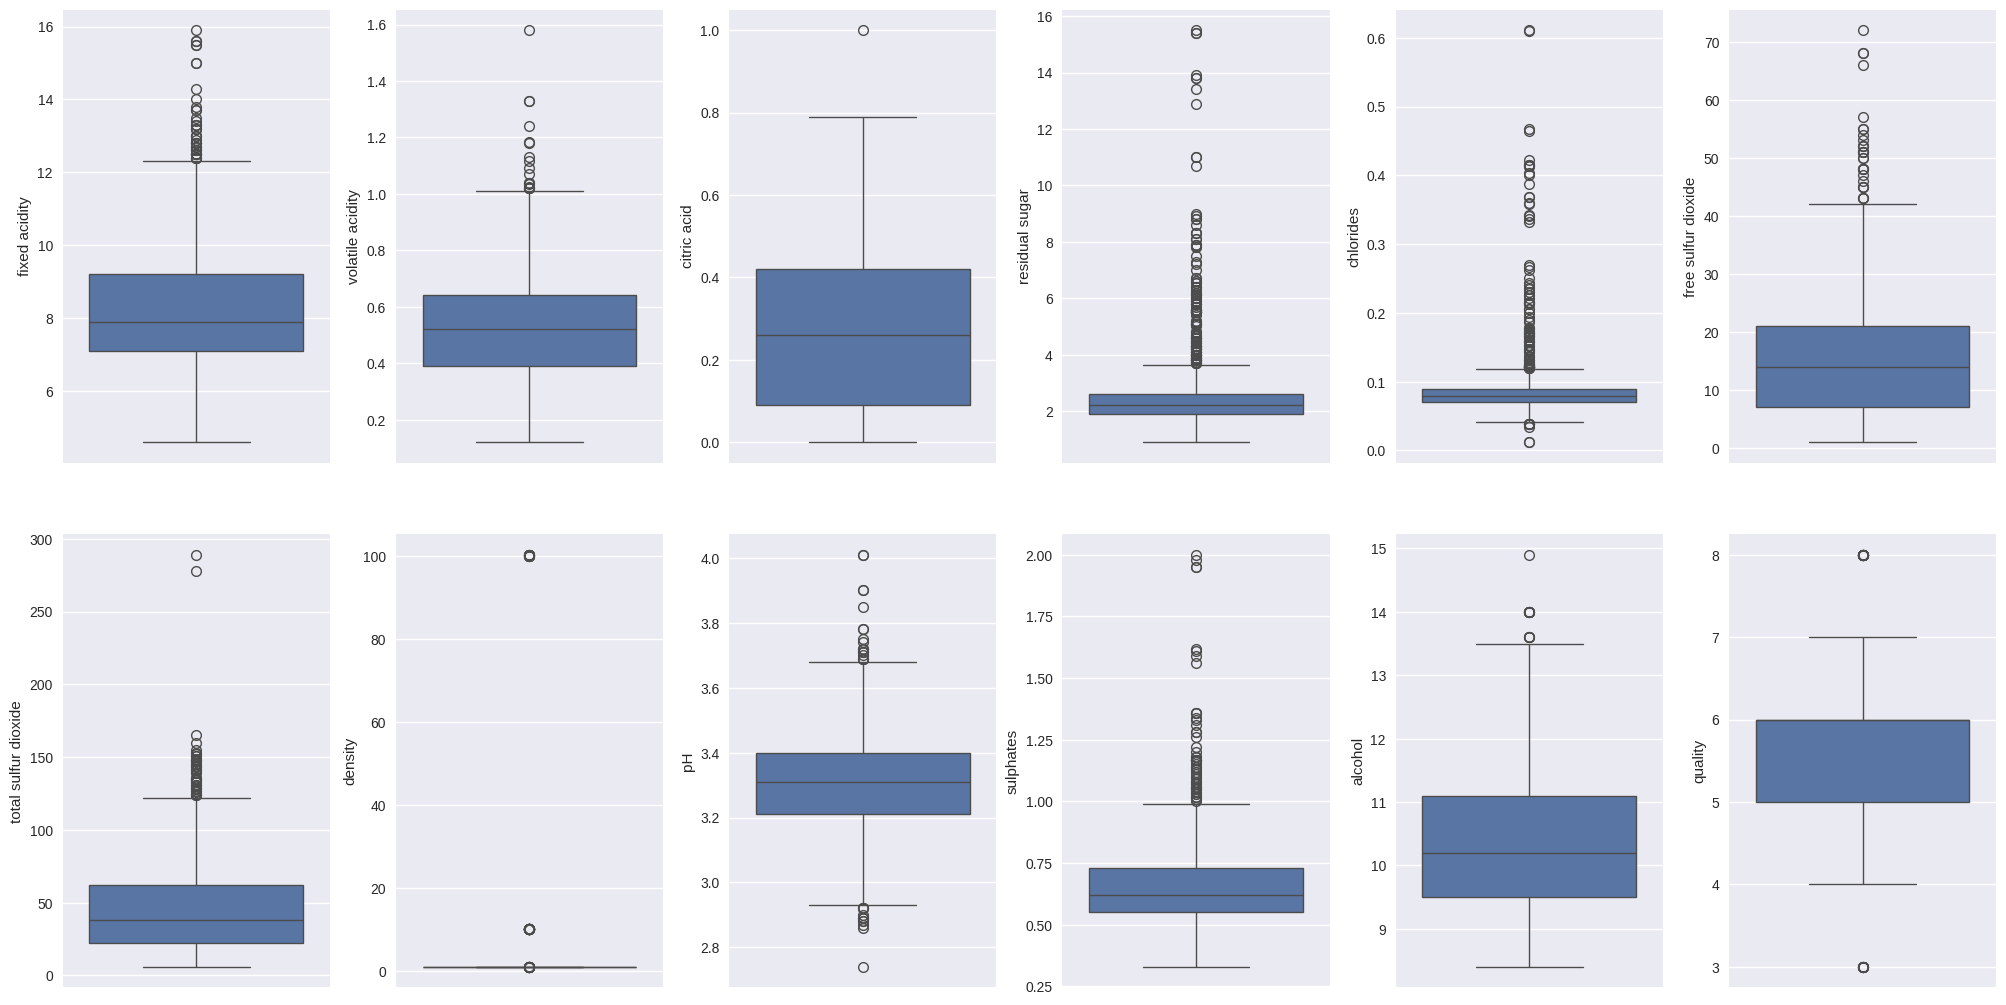

In [ ]:
# Observación del comportamiento de las variables en la gráfica de cajas y bigotes
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df_wine.items():
    if col != 'type':
        sns.boxplot(y=col, data=df_wine, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Fixed Acidity (Acidez Fija):

La mayoría de los valores están entre aproximadamente 6 y 10.
Valores Atípicos: Hay varios valores atípicos por encima de 10, llegando hasta 16.

Volatile Acidity (Acidez Volátil):

La mayoría de los valores están entre aproximadamente 0.2 y 0.6.
Hay algunos valores atípicos por encima de 0.6, llegando hasta 1.6.

Citric Acid (Ácido Cítrico):

La mayoría de los valores están entre 0 y 0.5.
Hay pocos valores atípicos por encima de 0.5, llegando hasta 1.0.

Residual Sugar (Azúcar Residual):

La mayoría de los valores están entre 2 y 4.
Hay muchos valores atípicos por encima de 4, llegando hasta 14.

Chlorides (Cloruros):

La mayoría de los valores están entre 0.02 y 0.1.
Hay muchos valores atípicos por encima de 0.1, llegando hasta 0.6.

Free Sulfur Dioxide (Dióxido de Azufre Libre):

La mayoría de los valores están entre 5 y 30.
Hay algunos valores atípicos por encima de 30, llegando hasta 70.

Total Sulfur Dioxide (Dióxido de Azufre Total):

La mayoría de los valores están entre 50 y 150.
Hay algunos valores atípicos por encima de 150, llegando hasta 300.

Density (Densidad):

La mayoría de los valores están alrededor de 0.99 a 1.0.
Hay algunos valores atípicos, uno cerca de 100 y otros cercanos a 0.

pH:

La mayoría de los valores están entre 3.0 y 3.4.
Valores Atípicos: Hay algunos valores atípicos por encima de 3.6 y por debajo de 2.8.

Sulphates (Sulfatos):

La mayoría de los valores están entre 0.5 y 0.8.
Hay varios valores atípicos por encima de 1.0, llegando hasta 2.0.

Alcohol:

La mayoría de los valores están entre 9 y 12.
Hay algunos valores atípicos por encima de 13, llegando hasta 15.

Quality (Calidad):

La mayoría de los valores están entre 5 y 6.
Hay algunos valores atípicos por debajo de 4 y por encima de 7, llegando hasta 8.

<ipython-input-43-ecd6e8ecf6d9>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_wine[variable], ax=ax[i // 6][i % 6])
<ipython-input-43-ecd6e8ecf6d9>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_wine[variable], ax=ax[i // 6][i % 6])
<ipython-input-43-ecd6e8ecf6d9>:13: UserWarning: 


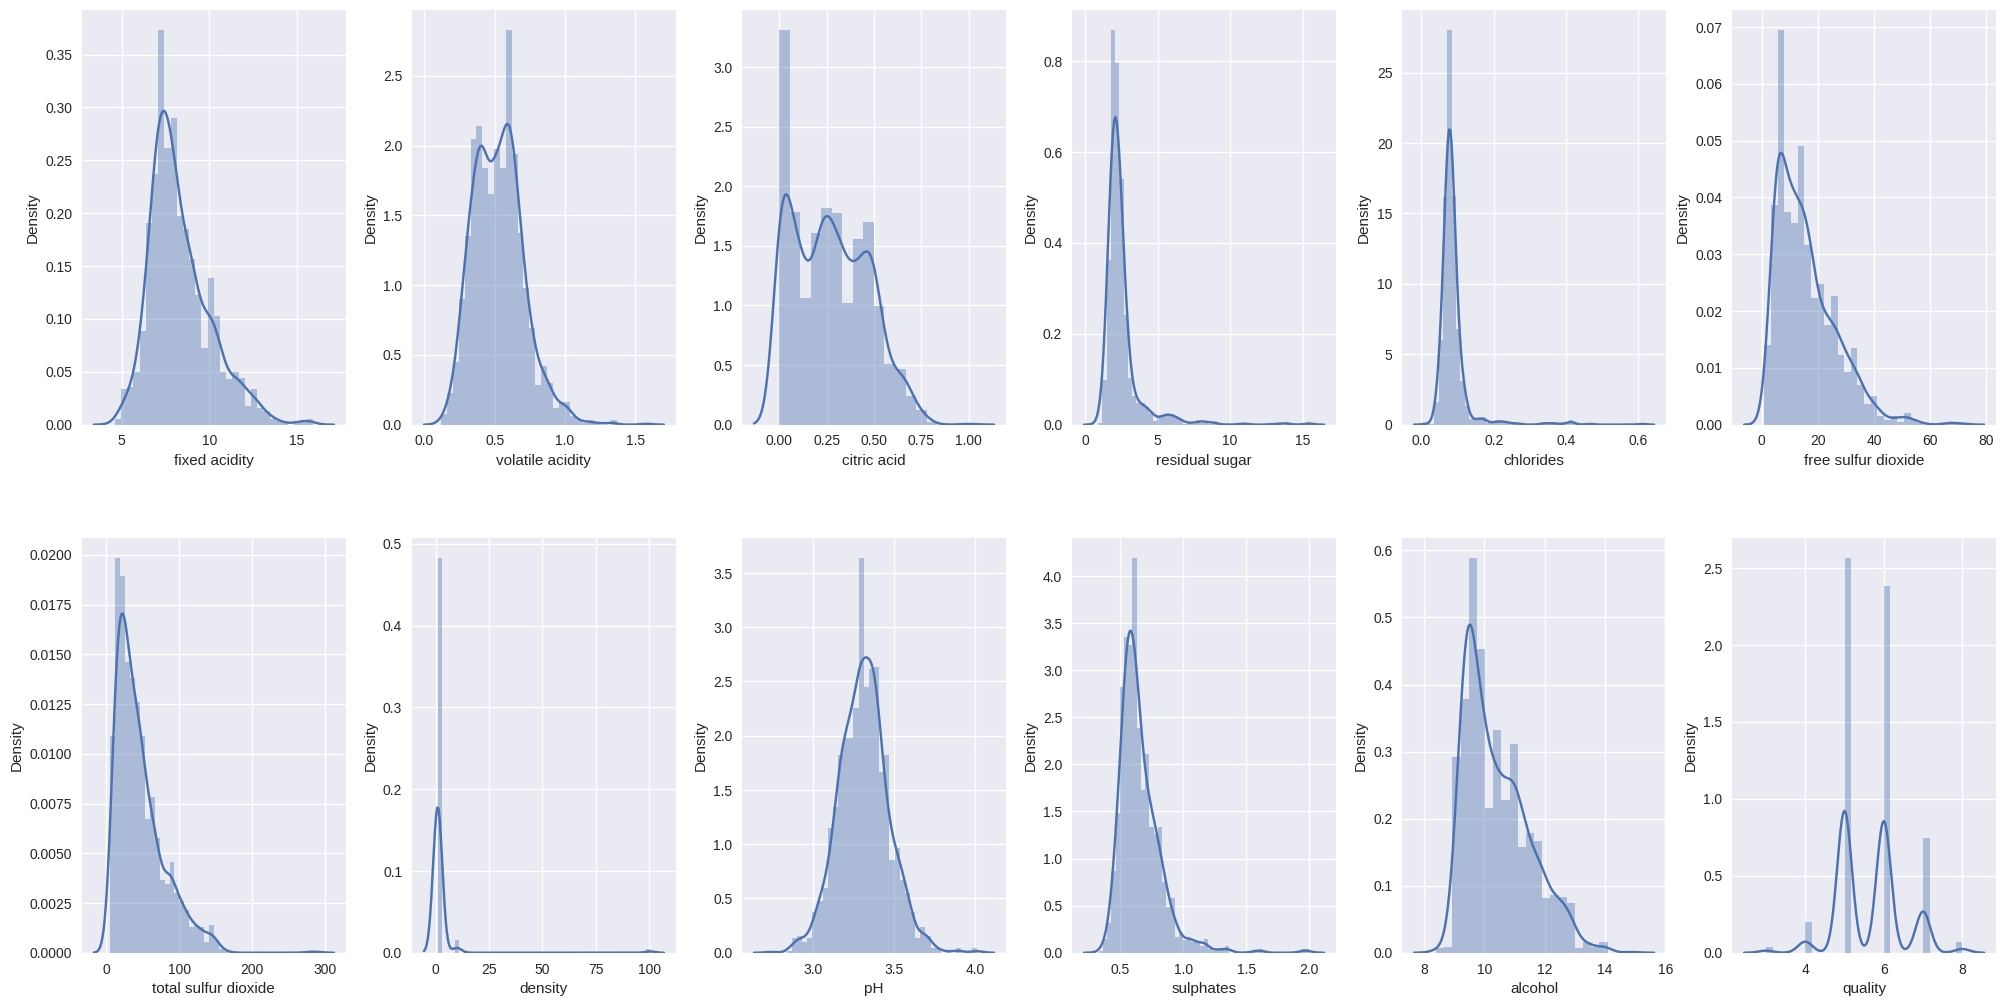

In [ ]:
# prompt: hacer distribución de cada variable


# Create a list of variables
variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
             'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# Create a figure and axes
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))

# Loop through each variable and create a distribution plot
for i, variable in enumerate(variables):
    sns.distplot(df_wine[variable], ax=ax[i // 6][i % 6])

# Adjust the layout
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Show the plot
plt.show()


## Análisis de las Distribuciones

Fixed Acidity (Acidez Fija):La acidez fija muestra una distribución sesgada a la derecha, con una mayoría de valores entre 6 y 10.

Volatile Acidity (Acidez Volátil):La acidez volátil también presenta una distribución sesgada a la derecha, con un pico alrededor de 0.5.

Citric Acid (Ácido Cítrico):Presenta una distribución con dos picos alrededor de 0.0 y 0.25.

Residual Sugar (Azúcar Residual): Sesgada a la derecha, con un pico significativo en valores bajos (alrededor de 2).

Chlorides (Cloruros):Sesgada a la derecha con un pico cerca de 0.05.

Free Sulfur Dioxide (Dióxido de Azufre Libre): Sesgada a la derecha con un pico alrededor de 15.

Total Sulfur Dioxide (Dióxido de Azufre Total):Sesgada a la derecha con un pico alrededor de 50.

Density (Densidad):Tiene una distribución muy sesgada a la derecha.

pH:Aproximadamente normal, con un pico alrededor de 3.3.

Sulphates (Sulfatos):Sesgada a la derecha con un pico alrededor de 0.5.

Alcohol:Sesgada a la derecha con un pico alrededor de 10.5.

Quality (Calidad): Distribución con 2 picos alrededor de 5 y 6.


De toda la información detallada más arriba tanto en los gráficos de caja y los de distribución se observan varios valores atípicos y distribuciones sesgadas hacia la derecha y algunas variables como el ácido cítrico y calidad muestran distribuciones de dos picos.

En este caso de opta por evaluar los valores de densidad para posteriormente decidir si se mantienen los datos atípicos, se los elimina o se los transforma.


In [ ]:
print(df_wine["density"].unique())

[0.9978   0.9968   0.997    0.998    0.9964   0.9946   0.9959   0.9943
 0.9974   0.9986   0.9969   0.9982   0.9966   0.9955   0.9962   0.9972
 0.9958   0.9993   0.9957   0.9975   0.994    0.9976   0.9934   0.9954
 0.9971   0.9956   0.9983   0.9967   0.9961   0.9984   0.9938   0.9932
 0.9965   0.9963   0.996    0.9973   0.9988   0.9937   0.9952   0.9916
 0.9944   0.9996   0.995    0.9981   0.9953   0.9924   0.9948   0.99695
 0.99545  0.99615  0.9994   0.99625  0.99585  0.99685  0.99655  0.99525
 0.99815  0.99745  0.9927   0.99675  0.99925  0.99565  0.996745 0.9985
 0.99965  0.99575  0.9999   0.9987   0.99935  0.99735  0.99915  0.9991
 0.9997   1.001    0.9979   0.99855  0.99845  0.9998   0.99645  0.99865
 0.9989   0.99975  0.999    0.9992   1.       0.9912   0.9949   0.9951
 0.9947   0.9995   0.9977   0.9917   0.9922   0.9921   0.99788  0.99768
 0.99782  0.99761  0.99803  0.99785  0.99656  0.99488  0.99823  0.99779
 0.99738  0.99701  0.99888  0.99938  0.99744  0.99668  0.99727  0.99586


Al analizar los datos de la variable densidad, se encontraron valores tales como 10.00 , 100.005 etc.
Los mismos no se condicen con los de densidad de vino cuyos valores esperados oscilan entre 0.8 a 1.5 g/l.
Se procedió a identificar los valores dispares y se los reemplazó por la mediana.


In [ ]:
# Calculate the median density
density_median = df_wine["density"].median()

# Identify rows where density is outside the range of 0 and 2
invalid_density_rows = df_wine[~df_wine["density"].between(0, 2)].index

# Replace invalid values with the median
df_wine.loc[invalid_density_rows, "density"] = density_median

# Verify the replacement
print("Unique values after replacement:")
print(df_wine["density"].unique())

# Print the number of remaining invalid values
print("\nNumber of remaining invalid values:")
print(df_wine[~df_wine["density"].between(0, 2)].shape[0])

Unique values after replacement:
[0.9978   0.9968   0.997    0.998    0.9964   0.9946   0.9959   0.9943
 0.9974   0.9986   0.9969   0.9982   0.9966   0.9955   0.9962   0.9972
 0.9958   0.9993   0.9957   0.9975   0.994    0.9976   0.9934   0.9954
 0.9971   0.9956   0.9983   0.9967   0.9961   0.9984   0.9938   0.9932
 0.9965   0.9963   0.996    0.9973   0.9988   0.9937   0.9952   0.9916
 0.9944   0.9996   0.995    0.9981   0.9953   0.9924   0.9948   0.99695
 0.99545  0.99615  0.9994   0.99625  0.99585  0.99685  0.99655  0.99525
 0.99815  0.99745  0.9927   0.99675  0.99925  0.99565  0.996745 0.9985
 0.99965  0.99575  0.9999   0.9987   0.99935  0.99735  0.99915  0.9991
 0.9997   1.001    0.9979   0.99855  0.99845  0.9998   0.99645  0.99865
 0.9989   0.99975  0.999    0.9992   1.       0.9912   0.9949   0.9951
 0.9947   0.9995   0.9977   0.9917   0.9922   0.9921   0.99788  0.99768
 0.99782  0.99761  0.99803  0.99785  0.99656  0.99488  0.99823  0.99779
 0.99738  0.99701  0.99888  0.99938  0.

In [ ]:
print(df_wine["density"])

0       0.99780
1       0.99680
2       0.99700
3       0.99800
4       0.99780
         ...   
1594    0.99490
1595    0.99512
1596    0.99574
1597    0.99547
1598    0.99549
Name: density, Length: 1592, dtype: float64


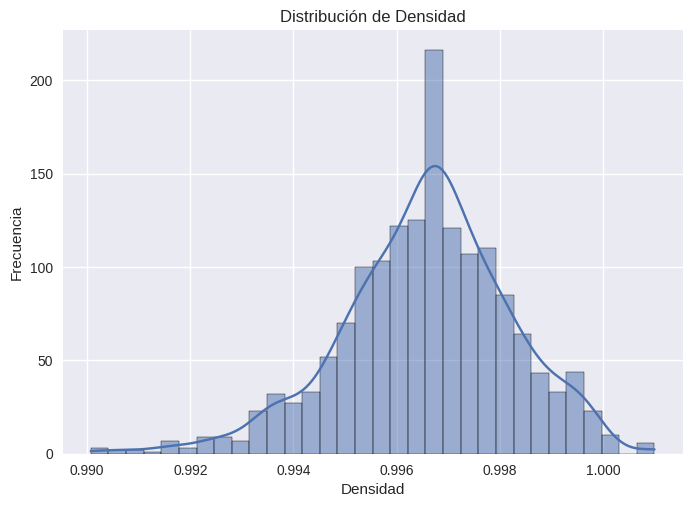

In [ ]:
# distribucion de la densidad

sns.histplot(data=df_wine, x="density", kde=True)

# Add labels and title
plt.xlabel("Densidad")
plt.ylabel("Frecuencia")
plt.title("Distribución de Densidad")

# Show the plot
plt.show()



La mayoría de los valores de densidad están entre 0.990 y 1.000, con un pico alrededor de 0.995.

La densidad del vino está estrechamente relacionada con su contenido de alcohol y azúcar.
La mayoría de los vinos tienen una densidad cercana al agua, lo que es esperado.

# # Comportamiento de todas la variables vs Calidad

In [ ]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000
mean,8.316646,0.527494,0.270986,2.537845,0.087511,15.881281,46.405779,0.996573,3.311363,0.658040,10.422079,5.633794
std,1.734891,0.179114,0.194890,1.410263,0.047153,10.467770,32.890552,0.001651,0.154139,0.169744,1.064184,0.808309
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996742,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997600,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.001000,4.010000,2.000000,14.900000,8.000000


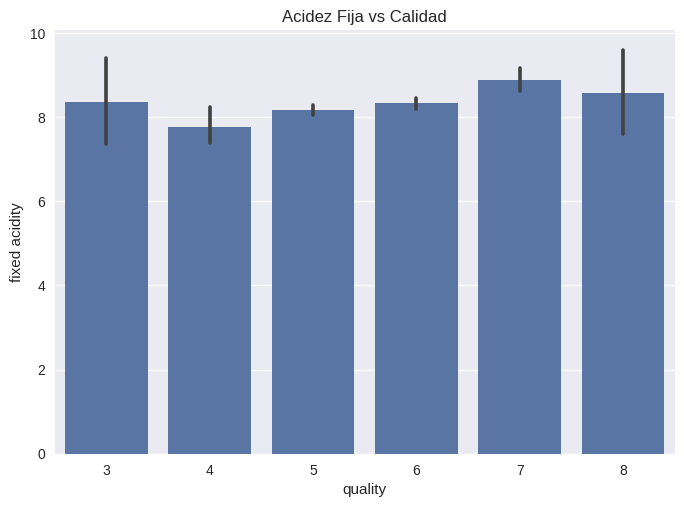

In [ ]:
# grafico de barra de acidez fija vs calidad


sns.barplot(x = 'quality', y = 'fixed acidity', data = df_wine)
plt.title('Acidez Fija vs Calidad')
plt.show()



El diagrama de barras muestra la acidez fija promedio para cada nivel de calidad del vino. No existe una relación clara entre la acidez fija y la calidad.

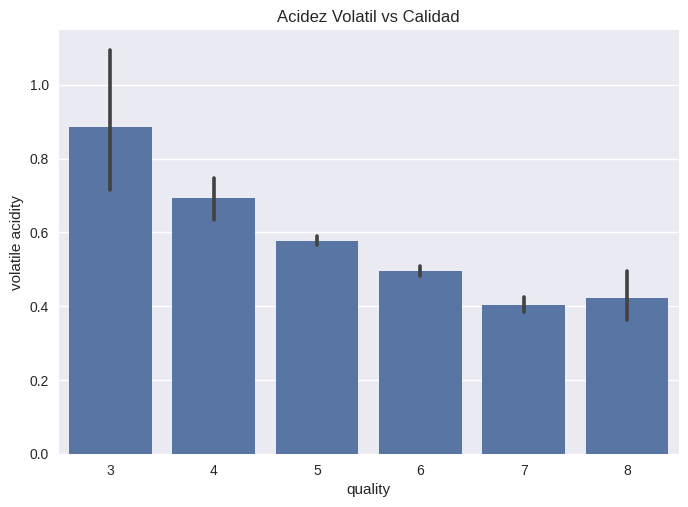

In [ ]:
# grafico de barras de acidez volatil vs calidad


sns.barplot(x = 'quality', y = 'volatile acidity', data = df_wine)
plt.title('Acidez Volatil vs Calidad')
plt.show()


El gráfico de barras muestra la acidez volátil promedio para cada nivel de calidad del vino.
Hay una ligera tendencia a disminuir la acidez volátil al aumentar la calidad.

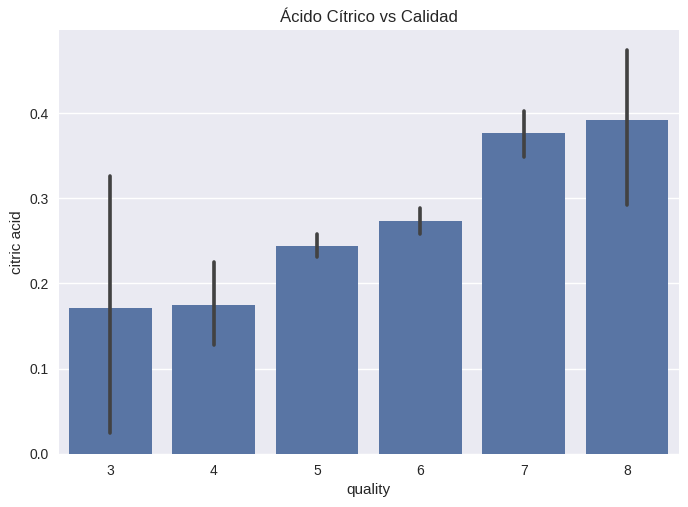

In [ ]:
# grafico de barras de ácido cítrico vs calidad


sns.barplot(x = 'quality', y = 'citric acid', data = df_wine)
plt.title('Ácido Cítrico vs Calidad')
plt.show()

El gráfico de barras muestra el contenido medio de ácido cítrico para cada nivel de calidad del vino. Existe una ligera tendencia a que el ácido cítrico aumente al aumentar la calidad del vino.

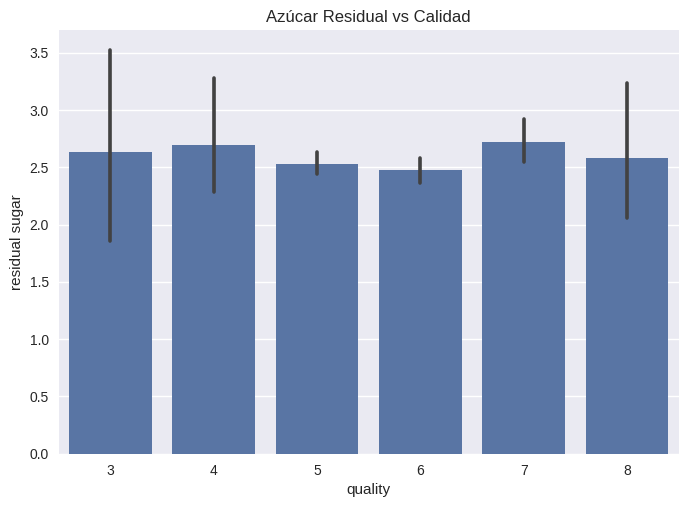

In [ ]:
# grafico de barras de azúcar residual vs calidad


sns.barplot(x = 'quality', y = 'residual sugar', data = df_wine)
plt.title('Azúcar Residual vs Calidad')
plt.show()

El gráfico de barras muestra el contenido medio de azúcar residual para cada nivel de calidad del vino. Hay tenue tendencia a que el azúcar residual disminuya al aumentar la calidad del vino.


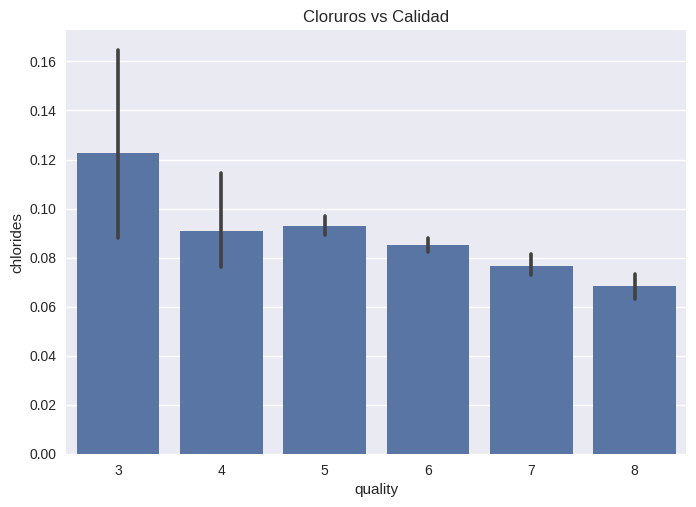

In [ ]:
# grafico de barras de cloruros vs calidad


sns.barplot(x = 'quality', y = 'chlorides', data = df_wine)
plt.title('Cloruros vs Calidad')
plt.show()

El gráfico de barras muestra el contenido medio de cloruro para cada nivel de calidad del vino. Existe una ligera tendencia a que los cloruros disminuyan a medida que aumenta la calidad del vino.

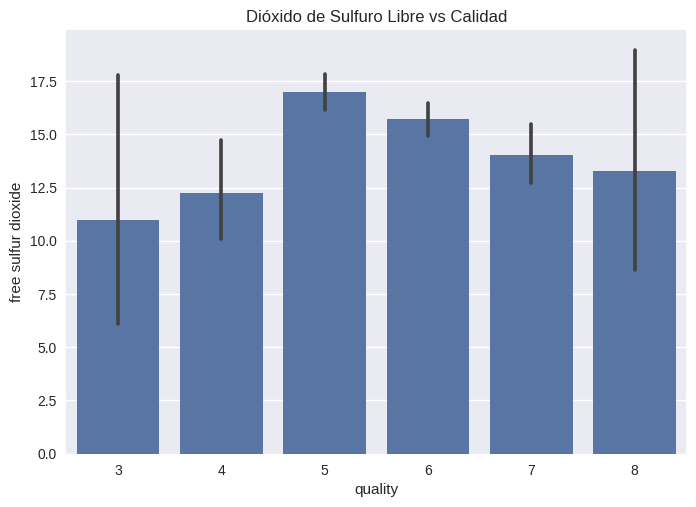

In [ ]:
# grafico de barras de Dioxido de Sulfuro Libre vs calidad


sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df_wine)
plt.title('Dióxido de Sulfuro Libre vs Calidad')
plt.show()

El contenido medio de dióxido de azufre libre es más bajo en los vinos con una calificación de calidad de 3.
El contenido medio de dióxido de azufre libre aumenta gradualmente para los vinos con calificaciones de calidad 4, 5 y 6.
Se produce una ligera disminución del contenido medio de dióxido de azufre libre en los vinos con una calificación de calidad de 7.
El contenido medio de dióxido de azufre libre es mayor en los vinos con una calificación de calidad de 8.

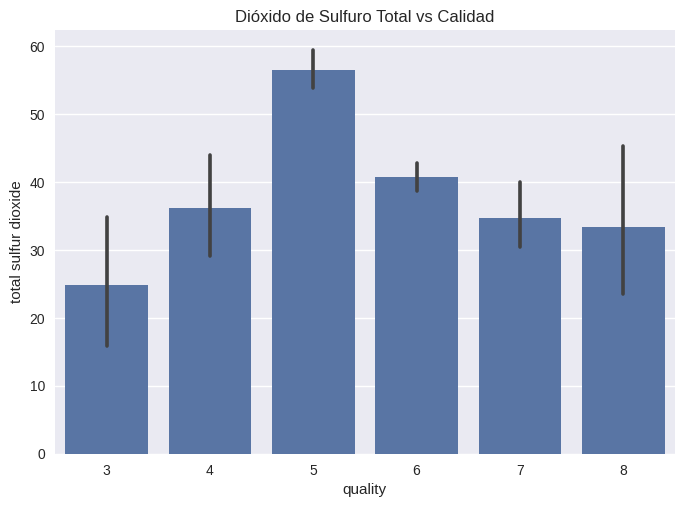

In [ ]:
# grafico de barras de Dioxido de Sulfuro Total vs calidad


sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df_wine)
plt.title('Dióxido de Sulfuro Total vs Calidad')
plt.show()

El contenido medio de dióxido de azufre total es más bajo en los vinos con una calificación de calidad de 3. El contenido medio de dióxido de azufre total aumenta gradualmente para los vinos con calificaciones de calidad 4, 5 y 6. Se produce una ligera disminución del contenido medio de dióxido de azufre total en los vinos con una calificación de calidad de 7 y 8.

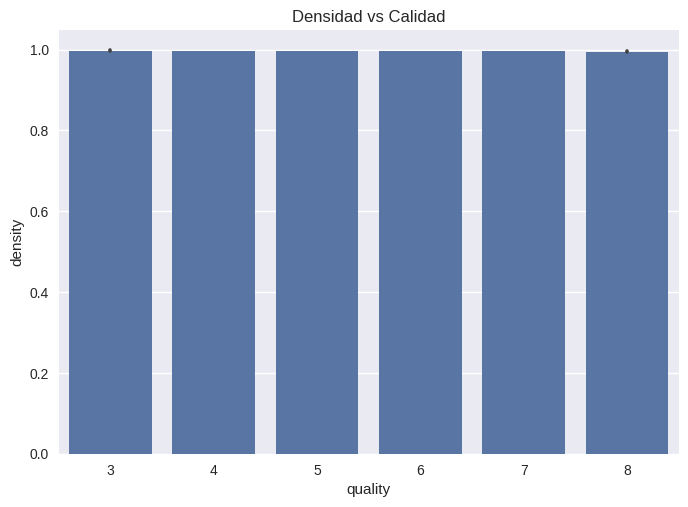

In [ ]:
# grafico de barras de Densidad vs calidad


sns.barplot(x = 'quality', y = 'density', data = df_wine)
plt.title('Densidad vs Calidad')
plt.show()

El gráfico de barras muestra la densidad media para cada nivel de calidad del vino. No existe una relación clara entre densidad y calidad.

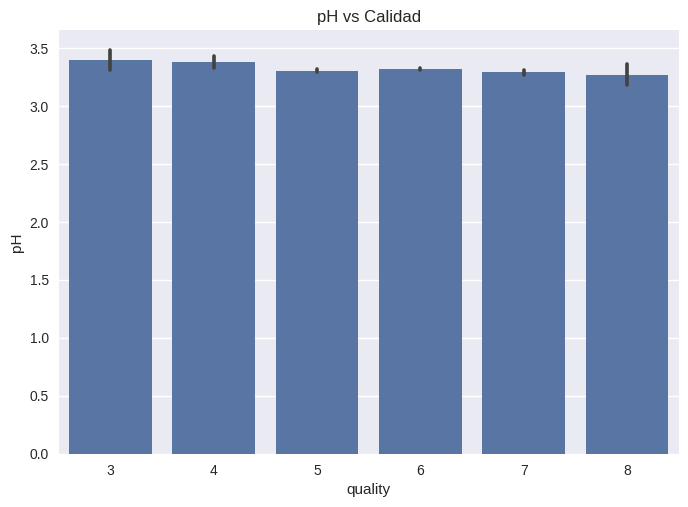

In [ ]:
# grafico de barras de pH vs calidad


sns.barplot(x = 'quality', y = 'pH', data = df_wine)
plt.title('pH vs Calidad')
plt.show()

El diagrama de barras muestra el pH promedio para cada nivel de calidad del vino. Existe una ligera tendencia a que el pH disminuya a medida que aumenta la calidad del vino.

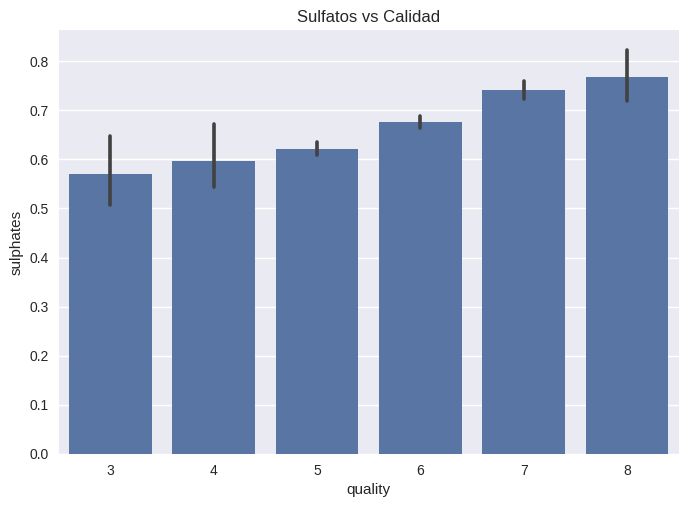

In [ ]:
# grafico de barras de Sulfatos vs calidad


sns.barplot(x = 'quality', y = 'sulphates', data = df_wine)
plt.title('Sulfatos vs Calidad')
plt.show()

El gráfico de barras muestra el contenido medio de sulfatos para cada nivel de calidad del vino. Existe una ligera tendencia a que los sulfatos aumenten a medida que aumenta la calidad del vino.

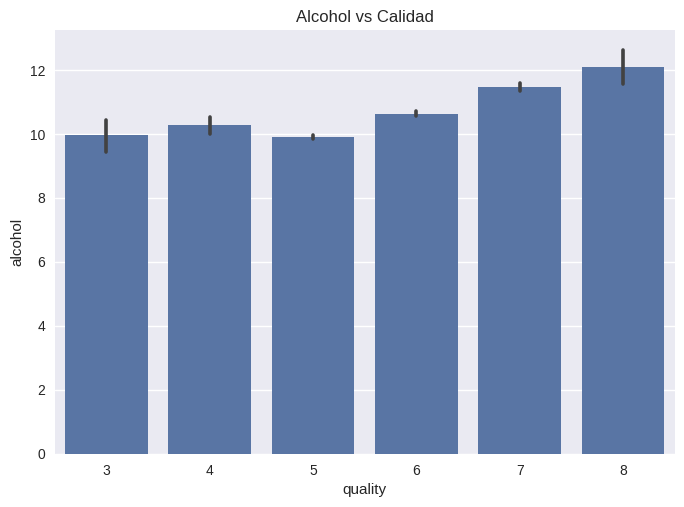

In [ ]:
# grafico de barras de Alcohol vs calidad


sns.barplot(x = 'quality', y = 'alcohol', data = df_wine)
plt.title('Alcohol vs Calidad')
plt.show()

El gráfico de barras muestra el contenido medio de alcohol para cada nivel de calidad de vino. Existe una clara tendencia a aumentar el contenido de alcohol a medida que aumenta la calidad del vino. Esto sugiere que un mayor contenido de alcohol se asocia con un vino de mejor calidad.